# Image Processing with scipy and numpy

#### author: davidkariuki259

This notebook follows the steps outlined in the Data Flair website https://data-flair.training/blogs/image-processing-with-scipy-and-numpy/


In [1]:
import os
os.chdir("C://Users//hp/Desktop//tuproject//pythons//image_manipulation") #change working directory to desktop

In [2]:
os.chdir("C:\\Users\\hp\\Desktop\\tuproject\\pythons\\image_manipulation") #this also accomplishes the directory setting

In [3]:
os.chdir(r"C:\Users\hp\Desktop\tuproject\pythons\image_manipulation") 
#this also accomplishes the directory setting, with 'r'indicating that it is a raw string

In [4]:
from scipy import misc
f=misc.face()
misc.imsave('demo.png',f)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
#heeding the warning and using imageio.imwrite:
import imageio
imageio.imwrite('demo2.png',f)

No warnings this time. The following code displays the image

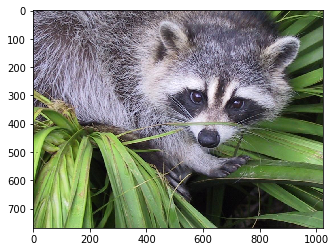

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(f,cmap=plt.cm.gray)

In [7]:
plt.show()#plt.show() shows nothing because plt has already been emptied in the above statement

In [8]:
f=misc.imread('demo.png')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [9]:
type(f)

numpy.ndarray

The imsave method saves an image images as array.

In [10]:
#heeding warning once more
f2=imageio.imread('demo.png')

In [11]:
type(f2)

imageio.core.util.Array

In [12]:
f.shape

(768, 1024, 3)

f.shape gives size of the array, in this case the image is 1024x768

In [13]:
f.dtype

dtype('uint8')

the dtype 'uint8' indicates that the image is an 8-bit image (hence can represent 0-255 colors, 256 in total)

## Opening a RAW file

A RAW file is one with the extension .raw. It is a camera image file holding minimally processed data from an image sensor. The sensor can be of a digital camera, a motion picture film scanner, or an image scanner. To create such a file:

In [14]:
f.tofile('demo.raw')

In [15]:
import numpy as np

In [16]:
fromraw=np.fromfile('demo.raw',dtype=np.uint8)
fromraw.shape

(2359296,)

In [17]:
fromraw.shape=(768, 1024, 3)

For much larger data, we can use memory mapping, in order to read data from the file but not load it into memory as shown below:

In [18]:
memmap=np.memmap('demo.raw',dtype=np.uint,shape=(768,1024,3))

## Generate Multiple random noisy images

In [19]:
for i in range (7):
    im=np.random.randint(0,256,10000).reshape((100,100))
    #imageio.imwrite('random_%02d.png'%i,im)
    misc.imsave('random_%02d.png'%i,im)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.


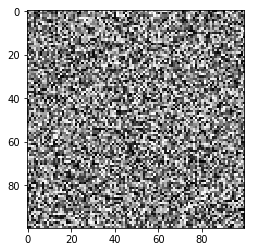

In [20]:
pic=imageio.imread('random_06.png')
plt.imshow(pic, cmap=plt.cm.gray, vmin=0, vmax=255)

We can now sort the generated images according to their file name. eg- consider a desktop scenario, where files are scattered across the surface

In [21]:
from glob import glob
filelist=glob('random*.png')
filelist.sort()

## Display Images in Python

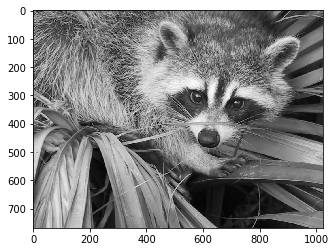

In [22]:
f1=misc.face(gray=True) #to show grayscale image
plt.imshow(f1, cmap=plt.cm.gray)

We can further use min and max values to increase contrast:

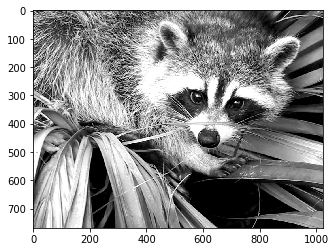

In [23]:
plt.imshow(f1,cmap=plt.cm.gray,vmin=30,vmax=200)

(-0.5, 1023.5, 767.5, -0.5)

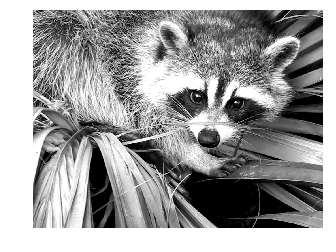

In [24]:
plt.imshow(f1,cmap=plt.cm.gray,vmin=30,vmax=200)
plt.axis('off') #removes the axes and ticks

To draw contour lines on the image:

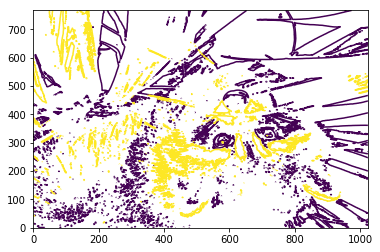

In [69]:
plt.contour(f1, [50,200]) #diplays upside down

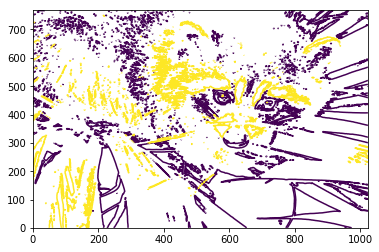

In [26]:
plt.contour(f1, [50,200], origin='upper') #origin set to
#upper sets the image right

## Interpolation

Adjusting the ‘interpolation’ argument, we can adjust the intensity variation. By setting it to ‘bilinear’, we get smooth intensity variations, and by setting it to ‘nearest’, we get a fine inspection of intensity variations.

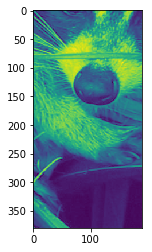

In [27]:
plt.imshow(f1[320:700,510:700]) #display cropped image

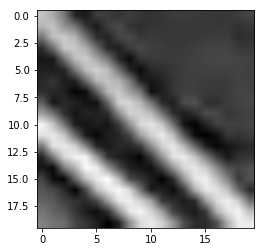

In [28]:
plt.imshow(f1[320:340,510:530],cmap=plt.cm.gray,interpolation='bilinear')

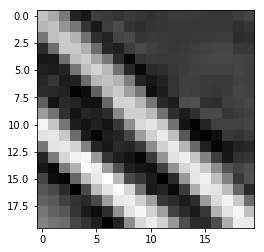

In [29]:
plt.imshow(f1[320:340,510:530],cmap=plt.cm.gray,interpolation='nearest')

## Other Basic Image Manipulation of Images Techniques

We can look at images as arrays and use numpy to handle and manipulate them, i.e- as arrays with an x-axis and y-axis

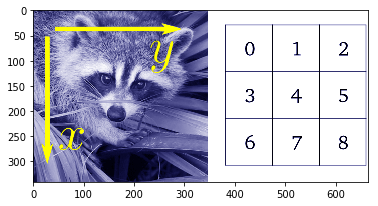

In [30]:
pic2=imageio.imread('image-representationpng.png')
plt.imshow(pic2, cmap=plt.cm.gray, vmin=0, vmax=255)

In [31]:
#To draw geometric shape around our photo:
face=misc.face(gray=True)
face[0,40]

127

In [32]:
face[10:13,20:23]

array([[141, 153, 145],
       [133, 134, 125],
       [ 96,  92,  94]], dtype=uint8)

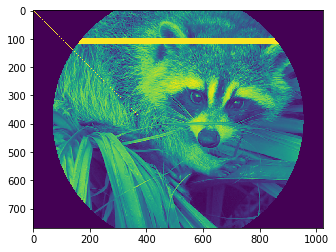

In [33]:
face[100:120]=255
lx,ly=face.shape#note that this is lowercase 'L' not the number one
X,Y=np.ogrid[0:lx,0:ly]
mask=(X-lx/2)**2+(Y-ly/2)**2>lx*ly/4
face[mask]=0
face[range(400),range(400)]=255
plt.imshow(face)

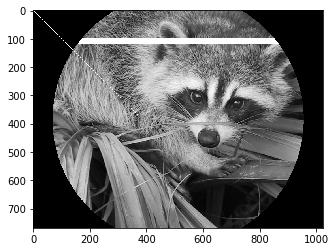

In [34]:
plt.imshow(face,cmap=plt.cm.gray,vmin=0,vmax=255)

We can use the max() and min() functions to return the maximum
and minimum along a given axis.
The function mean() on the other hand returns the average of the array elements along the given axis

In [35]:
face=misc.face(gray=True)
face.mean()

113.48026784261067

In [36]:
face.max()

250

In [37]:
face.min()

0

We can rotate, crop and flip the image using scipy

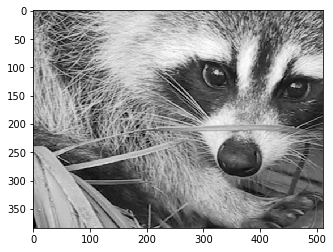

In [38]:
#crop the image
face=misc.face(gray=True)
lx,ly=face.shape
crop=face[lx//4:-lx//4,ly//4:-ly//4]
plt.imshow(crop,cmap=plt.cm.gray)

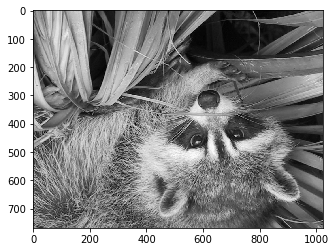

In [39]:
#flip the image
flip=np.flipud(face)
plt.imshow(flip,cmap=plt.cm.gray)

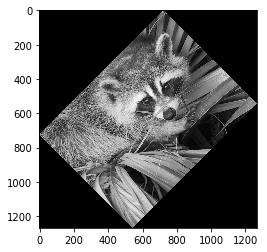

In [40]:
#rotate the image
from scipy import ndimage
rotate=ndimage.rotate(face,45)
plt.imshow(rotate,cmap=plt.cm.gray)

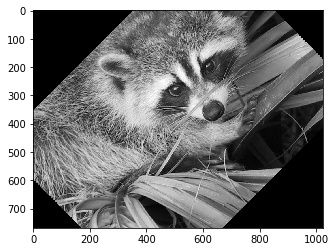

In [41]:
rotate_noreshape=ndimage.rotate(face,45,reshape=False)
plt.imshow(rotate_noreshape, cmap=plt.cm.gray)

## Filtering an Image

We can use Python to blur/smooth, sharpen and denoise images. Moreover, through local filters, we can use a function of values of the neighboring pixels to replace the value of a pixel

### -Blurring/Smoothing effect

This can be achieved using Gaussian or uniform filter:

In [42]:
face=misc.face(gray=True)

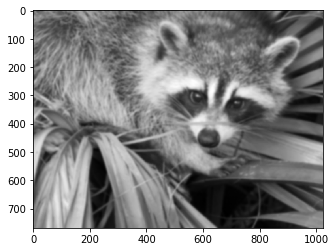

In [43]:
blurred=ndimage.gaussian_filter(face,sigma=3)
plt.imshow(blurred,cmap=plt.cm.gray)

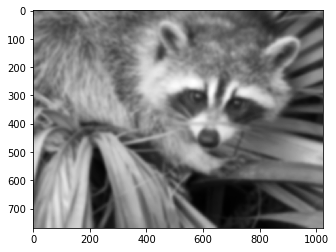

In [44]:
#we can increase blurring effect by increasing sigma value
way_blurred=ndimage.gaussian_filter(face,sigma=5)
plt.imshow(way_blurred, cmap=plt.cm.gray)

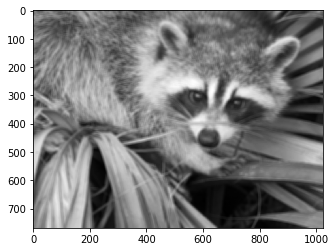

In [45]:
local_mean=ndimage.uniform_filter(face,size=11)
plt.imshow(local_mean, cmap=plt.cm.gray)

### -Sharpening Effect

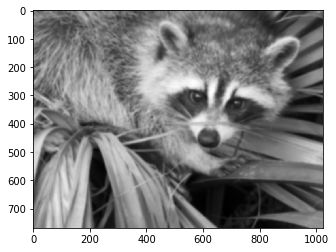

In [46]:
#produce a blurred image
face=misc.face(gray=True).astype(float)
blurred=ndimage.gaussian_filter(face,3)
plt.imshow(blurred, cmap=plt.cm.gray)

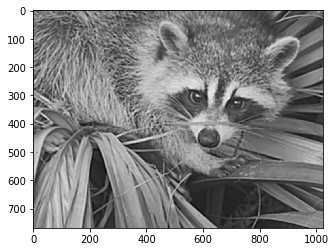

In [47]:
#the image is then sharpened by adding Laplacian approximation to increase weight of edges
filter_blurred=ndimage.gaussian_filter(blurred,1)
alpha=30
sharpened=blurred+alpha*(blurred-filter_blurred)
plt.imshow(sharpened, cmap=plt.cm.gray)

### -Denoising Effect

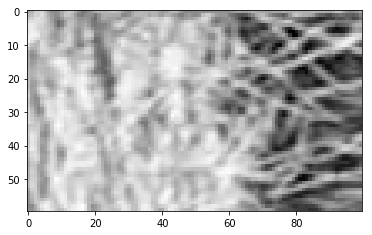

In [48]:
#crop the image
f=misc.face(gray=True)
f=f[230:290,220:320]
plt.imshow(f, cmap=plt.cm.gray)

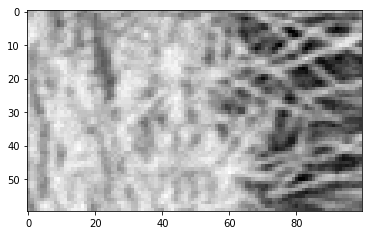

In [49]:
#adding noise to the image above:
noisy=f+0.4*f.std()*np.random.random(f.shape)
plt.imshow(noisy, cmap=plt.cm.gray)

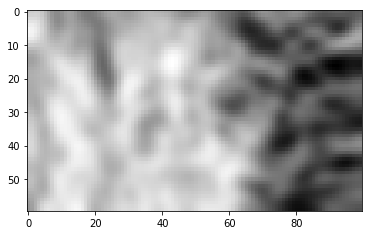

In [50]:
#we can then smooth out the noise and edges using a Gaussian filter
gauss_denoised=ndimage.gaussian_filter(noisy,2)
plt.imshow(gauss_denoised, cmap=plt.cm.gray)

The edges are not well defined in the above image. To preserve the edges, we can use a median filter:

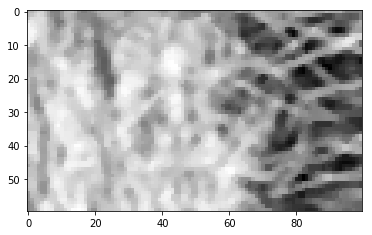

In [51]:
median_denoised=ndimage.median_filter(noisy,3)
plt.imshow(median_denoised, cmap=plt.cm.gray)

The above image is similar to the original cropped image

For figures with straight boundaries and low curvature, a median filter provides better result as demonstrated below:

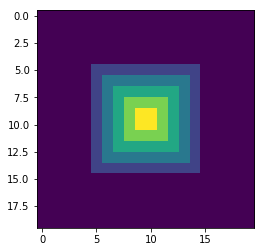

In [52]:
#generating picture with straight boundaries:
im=np.zeros((20,20))
im[5:-5,5:-5]=1
im=ndimage.distance_transform_bf(im)
plt.imshow(im)

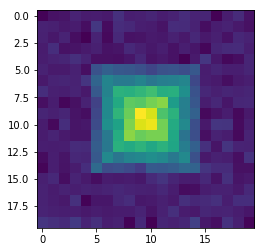

In [53]:
#adding noise to the generated image:
im_noise=im+0.2*np.random.randn(*im.shape)
plt.imshow(im_noise)

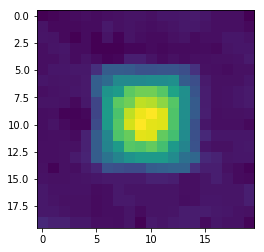

In [54]:
#median filter:
im_med=ndimage.median_filter(im_noise,3)
plt.imshow(im_med)

## Extracting Features

We can extract features from images such as detecting edges and carrying out segmentation as demonstrated below:

### -Edge Detection

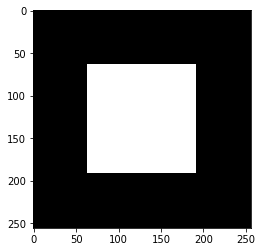

In [55]:
#generate white square image with black background:
im=np.zeros((256,256))
im[64:-64,64:-64]=1
plt.imshow(im, cmap=plt.cm.gray)

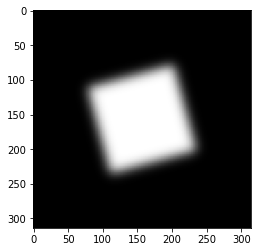

In [56]:
#rotate and introduce blurrred effect:
im=ndimage.rotate(im,15,mode='constant')
im=ndimage.gaussian_filter(im,8)
plt.imshow(im, cmap=plt.cm.gray)

For such high-intensity variations, we can use Sobel, a gradient operator along various axes as shown below:

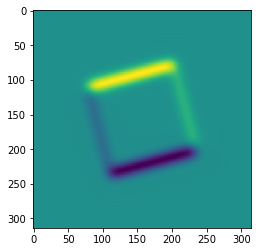

In [57]:
#along x-axis
sx=ndimage.sobel(im,axis=0,mode='constant')
plt.imshow(sx)
#gradient change along x-axis only will be detected

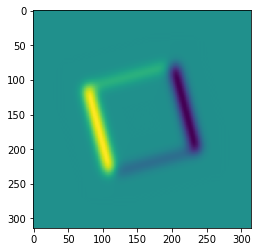

In [58]:
#along y-axis
sy=ndimage.sobel(im,axis=1,mode='constant')
plt.imshow(sy)

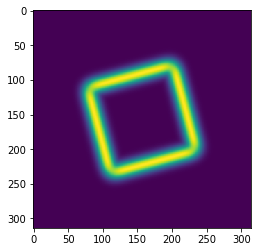

In [59]:
#along both axes:
sob=np.hypot(sx,sy)
plt.imshow(sob)

## -Segmentation

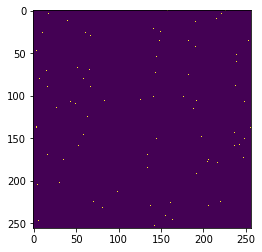

In [60]:
#draw dots on black background(think of stars at night)
n, l=10, 256 #Lowercase L
im=np.zeros((l,l)) #generates black background
np.random.seed(1) #seed to be used for random generation
points=l*np.random.random((2,n**2))#generate random points
im[(points[0]).astype(np.int),(points[1]).astype(np.int)]=1 #populate points with color
plt.imshow(im)

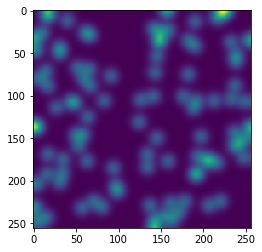

In [61]:
#introducing noise
im=ndimage.gaussian_filter(im,sigma=l/(4.*n))
plt.imshow(im)

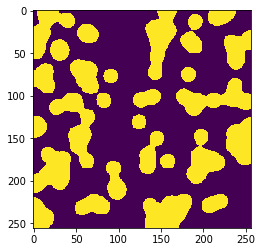

In [62]:
#recover original image and manipulate it:
mask=(im>im.mean()).astype(np.float)
mask+=0.1*im
img=mask+0.2*np.random.randn(*mask.shape)
plt.imshow(mask)

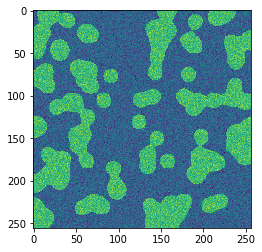

In [63]:
plt.imshow(img)

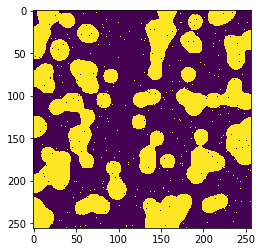

In [65]:
binary_img=img>0.5
plt.imshow(binary_img)

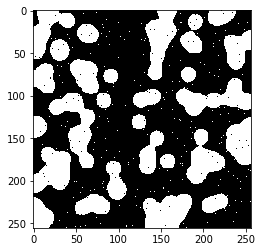

In [66]:
plt.imshow(binary_img,cmap=plt.cm.gray)